In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
H0 = 70
Om0 = 0.3
Ode0 = 0.7
zfin = 100
xini = 0
xfin = np.log(1. / (1 + zfin))
xval = np.linspace(xini, xfin, 50)
zval = np.linspace(0,2,50)



## ---------------TSALLIS----------------
def tsallis_model(Omega, x, d_value = 1.82, c= 1.12,H0 = 65.21):
    Q = 2*(2 - d_value)*((3*c**2 / 3) ** (1. / (2 * (d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega ** (1. / (2 * (2 - d_value))))*np.exp(
            (3*(1 - d_value)/(2*(2 - d_value)))*x))
    return dOmega


## --------------- BARROW ---------------
def RHS_x_hde_barrow(Omega,x,b=1.6196,c=1.1413,H0 = 65.23):
    Q = (2-Omega)*((c**2)**(1./(b-2)))*((H0*np.sqrt(Om0))**(b/(2 -b)))
    dOmega = Omega*(1-Omega)*(b + 1 + Q*((1-Omega)**(b/2*(b -2)))*(Omega**(1./(2-b)))*np.exp((3*b/(2-b))*x))
        #print(self.c)
    return dOmega



## ---------------- STANDARD --------------
def hde_model(y,z,c_value = 0.8877 ):

    dydz = -(y*(1-y)/(1+z))*((2*(np.sqrt(y)))/c_value + 1) 
    return dydz




sol_tsallis = odeint(tsallis_model,Ode0,xval)
sol_barrow  = odeint(RHS_x_hde_barrow,Ode0,xval)
sol_hde     = odeint(hde_model,Ode0,zval)




/tmp/ipykernel_183197/1739315852.py:12: RuntimeWarning: invalid value encountered in sqrt
  dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
/tmp/ipykernel_183197/1739315852.py:12: RuntimeWarning: invalid value encountered in power
  dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
/tmp/ipykernel_183197/1739315852.py:12: RuntimeWarning: invalid value encountered in log
  dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
/home/alfonsozapata/anaconda3/envs/cosmodesi/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to ge

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.9613013434859D+00   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.6054769659231D+00   r2 =                  NaN


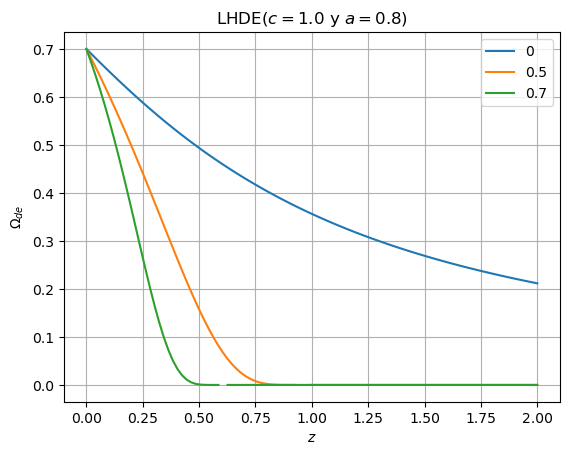

In [4]:
H0 = 70 
z_rs = np.linspace(0,2,100)
Om0 = 0.3 
Ode0 = 0.7 
b1 = [0,0.5,0.7]

## ------ MODELO LINEAL --------
def fun_linear(Omega, z,b, c=1.3421,a=1.0):
    f = a + b*z
    f_prim =  b
    Q = c**2/(Om0*(1+z)**3)*(H0**2)
    dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
    return dOmega


solutions_linear = []
for b in b1:
    sol = odeint(fun_linear, Ode0,z_rs, args=(b,))
    solutions_linear.append(sol)

solutions_linear_reshaped = []
for sol in solutions_linear:
    solutions_linear_reshaped.append(sol[:, 0].reshape(-1))


for sol_reshaped in solutions_linear_reshaped:
    plt.plot(z_rs, sol_reshaped)





plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('LHDE($c = 1.0$ y $a=0.8$)')
plt.legend(b1)
plt.grid(True)
plt.show()

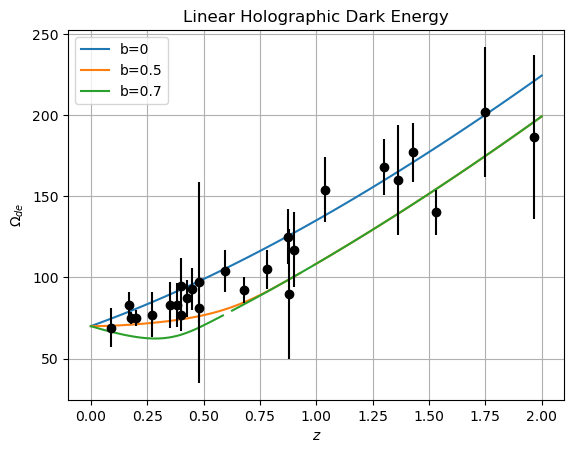

In [5]:
arr_hub = np.loadtxt('/home/alfonsozapata/Documents/HolographicDE/HolographicDE/Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 70

def RHSquared_z(z, sol_ode):
    return H0 * np.sqrt(( Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z = []
for sol_ode in solutions_linear_reshaped:
    Hub = RHSquared_z(z_rs, sol_ode)
    Hubble_z.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_z):
    plt.plot(z_rs, Hub, label=f'b={b1[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='black')
#plt.plot(z_rs, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Linear Holographic Dark Energy')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
## ------ MODELO SENO -------


rr = np.linspace(-1,1,5)
def fun_sin(Omega, z,b, c=1.0, k=0.7491):
    f = k + r*np.sin(z)
    f_prim =  r*np.cos(z)
    Q = c**2/(Om0*(1+z)**3)*(H0**2)
    dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
    return dOmega


solutions_sin = []
for r in rr:
    sol = odeint(fun_sin, Ode0,z_rs, args=(r,))
    solutions_sin.append(sol)

solutions_sin_reshaped = []
for sol in solutions_sin:
    solutions_sin_reshaped.append(sol[:, 0].reshape(-1))


for sol_reshaped in solutions_sin_reshaped:
    plt.plot(z_rs, sol_reshaped)


for sol_reshaped in solutions_sin_reshaped:
    plt.plot(z_rs, sol_reshaped)


plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('SHDE($c = 1.0$ y $a=0.8$)')
plt.legend(rr)s
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (1545703972.py, line 34)

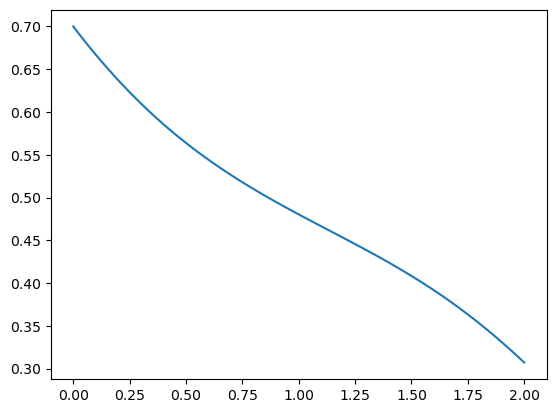

In [24]:
def fun_sin_fix(Omega, z, c= 1.0286, k=0.7 ,r=0.0,H0 = 65.24):
    f = k + r*np.sin(z)
    f_prim =  r*np.cos(z)
    Q = c**2/((Om0*(1+z)**3)*(H0**2))
    dOmega = - (Omega*(1-Omega)/(1+z))*((np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f)/(2*(f-2))))*(2 - f)  + f + 1 + ((np.log(Q*(1-Omega)/Omega))**(-(1+z)*f_prim/(f-2))) )
    return dOmega


def fun_linear_fix(Omega, z,c=1.1,a = 0.1  , b = 0.3,h= 65.1):
    x = np.log(1./(1+z))
    C = 3*(c**2)
    Q = (C*np.exp(3*x))/(3*(h**2)*Om)
    dOmega = -(Omega*(1-Omega)/(1+z))*(np.sqrt(Omega)*(C/3)**(-1/2)*((Q*(1 -Omega)/Omega)**((a + b*z)/ (2*(a +b*z-2))))* (2 - a - b*z)+ (np.log((Q* (1 -Omega)/Omega)**(-b*(1 + z)/(a + b*z -2))))  + a + b*z + 1)
    return dOmega




solution_fix_sin = odeint(fun_sin_fix, 0.7,z_rs)
solution_fix_lin = odeint(fun_linear_fix,0.7,z_rs)


sol_sin_re = solution_fix_sin.reshape(-1)
sol_lin_re = solution_fix_lin.reshape(-1)
plt.plot(z_rs,sol_lin_re)

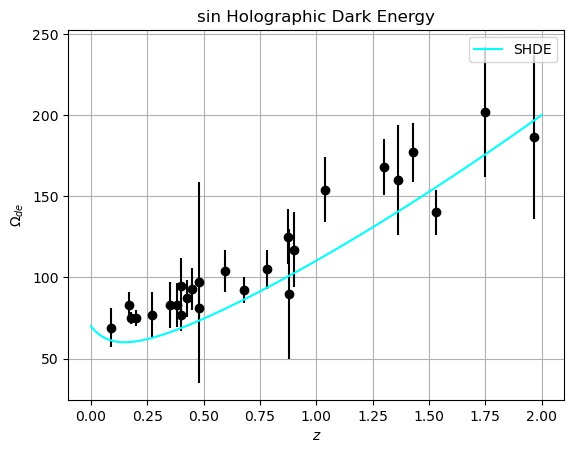

In [ ]:
H_sin = RHSquared_z(z_rs,sol_sin_re)

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='black')
plt.plot(z_rs,H_sin , color='cyan', label='SHDE')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('sin Holographic Dark Energy')
plt.legend()
plt.grid(True)
plt.show()

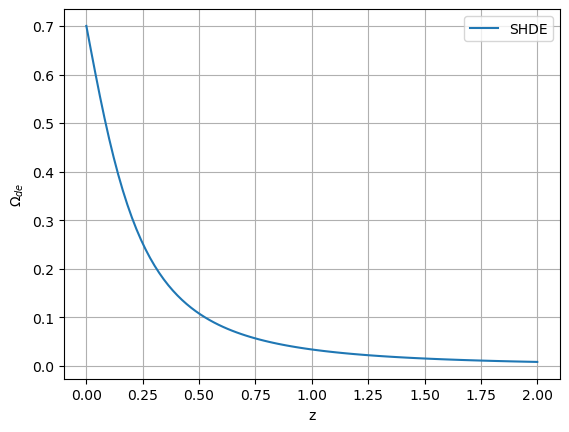

In [ ]:
#plt.plot(zval,sol_tsallis_re,label='THDE')
#plt.plot(zval,sol_barrow_re,label='BHDE')
#plt.plot(zval,sol_hde_re,label='HDE')
plt.plot(z_rs,sol_sin_re,label='SHDE')
#plt.plot(z_rs,sol_lin_re,label='LHDE')
plt.legend()
plt.ylabel('$\Omega_{de}$')
plt.xlabel('z')
plt.grid(True)

-1.4444981643501988


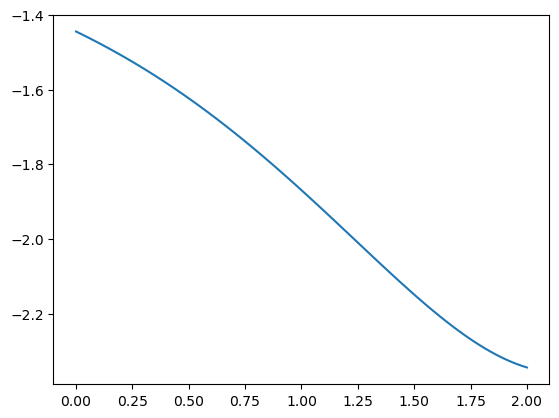

In [25]:
def Eos_lin(Omega, z,c=1.1,a = 0.3  , b = 0.1,H0 = 65.1):
    f = a+b*z
    f_prim = b
    x = np.log(1./(1+z))
    C = 3*(c**2)
    Q = (C*np.exp(3*x))/(3*(H0**2)*Om)
    w = -(f + 1)/3 + (f - 2)*(np.sqrt(Omega)/3*((C/3)**(-1/2)))*((Q*(1 - Omega)/Omega)**(f/(2*(f - 2)))) + (1 + z)*(f_prim/3)*np.log((Q*(1 - Omega)/Omega)**(1 / (2 - f))) 
    return w  




#def Eos_sin(Omega, z, c= 1.0286, k=0.7491 ,r=0.7364,H0 = 65.24):
 #   f = k+r*np.sin(z)
  #  f_prim = r*np.cos(z)
   # Q = c**2/((Om0*(1+z)**3)*(H0**2))
   # w = -(2*f -1)/3 + ((2*(f-2)*np.sqrt(Omega))/(3*c))*((Q*(1-Omega)/Omega)**((f-1)/(f-2))) + ((2*(1+z)*f_prim)/3)*((np.log(Q*(1-Omega)/Omega))**(1/(2*(2-f))))
   # return w



#eos_sin = Eos_sin(sol_sin_re,z_rs)
eos_lin = Eos_lin(sol_lin_re,z_rs)
print(eos_lin[0])

#plt.plot(z_rs,eos_sin)
plt.plot(z_rs,eos_lin)






nan


/tmp/ipykernel_4380/3997535620.py:5: RuntimeWarning: divide by zero encountered in log
  w = -(2*f -1)/3 + ((2*(f-2)*np.sqrt(Omega))/(3*c))*((Q*(1-Omega)/Omega)**((f-1)/(f-2))) + ((2*(1+z)*f_prim)/3)*((np.log(Q*(1-Omega)/Omega))**(1/(2*(2-f))))
/tmp/ipykernel_4380/3997535620.py:5: RuntimeWarning: invalid value encountered in multiply
  w = -(2*f -1)/3 + ((2*(f-2)*np.sqrt(Omega))/(3*c))*((Q*(1-Omega)/Omega)**((f-1)/(f-2))) + ((2*(1+z)*f_prim)/3)*((np.log(Q*(1-Omega)/Omega))**(1/(2*(2-f))))


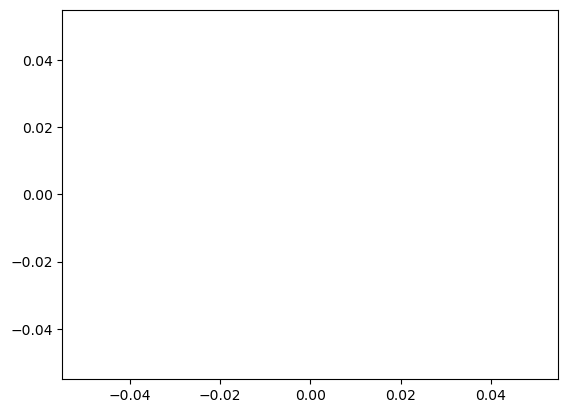

In [ ]:
def Eos_sin(Omega,z,a =1.0,b=0,c = 1.0):
    f = a+b*np.sin(z)
    f_prim = b*np.cos(z)
    Q = c**2/(Om0*(1+z)**3)*(70**2)
    w = -(2*f -1)/3 + ((2*(f-2)*np.sqrt(Omega))/(3*c))*((Q*(1-Omega)/Omega)**((f-1)/(f-2))) + ((2*(1+z)*f_prim)/3)*((np.log(Q*(1-Omega)/Omega))**(1/(2*(2-f))))
    return w

eos_sin = Eos_sin(1,z_rs)
print(eos_sin[1])
plt.plot(z_rs,eos_sin)

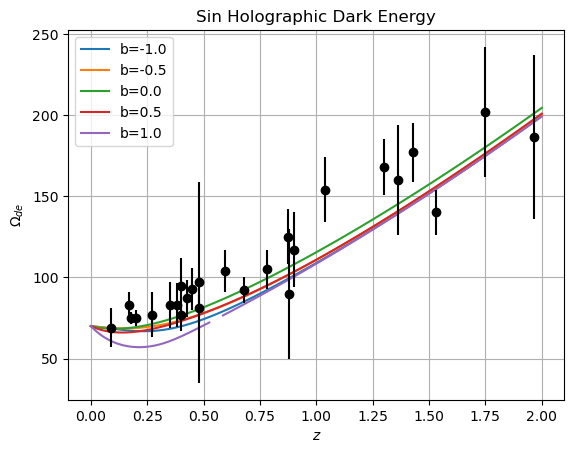

In [ ]:
Hubble_z_sin = []
for sol_ode in solutions_sin_reshaped:
    Hub = RHSquared_z(z_rs, sol_ode)
    Hubble_z_sin.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_z_sin):
    plt.plot(z_rs, Hub, label=f'b={rr[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='black')
#plt.plot(z_rs, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Sin Holographic Dark Energy')
plt.legend()
plt.grid(True)
plt.show()


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.2020202020202D-01   r2 =                  NaN


/tmp/ipykernel_4380/1911719231.py:6: RuntimeWarning: invalid value encountered in power
  dOmega =   -(Omega*(1-Omega)/(1+z))*(np.sqrt(Omega)*(C / (3))**(-1/2)*((Q*(1 -Omega)/Omega)**((a + b*z)/ (2*(a +b*z-2))))* (2 - a - b*z)+ (np.log(Q* (1 -Omega)/Omega))**(-b * (1 + z)/(a + b*z -2)) + a + b*z + 1)


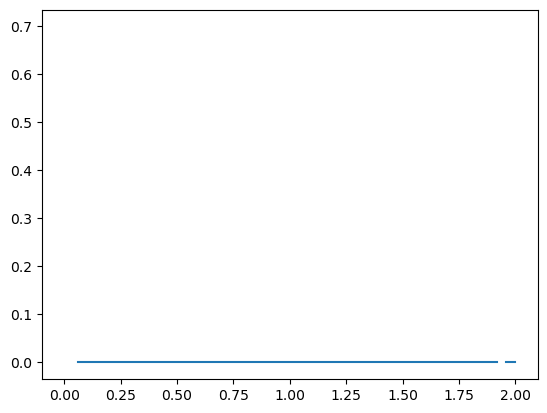

In [ ]:
z_rss = np.linspace(0,2,100)
def fun_linear_fix1(Omega, z,c=1.0,a = 0.0565, b =0.0374,H0 = 70):
    x = np.log(1./(1+z))
    C = 3*(c**2)
    Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
    dOmega =   -(Omega*(1-Omega)/(1+z))*(np.sqrt(Omega)*(C / (3))**(-1/2)*((Q*(1 -Omega)/Omega)**((a + b*z)/ (2*(a +b*z-2))))* (2 - a - b*z)+ (np.log(Q* (1 -Omega)/Omega))**(-b * (1 + z)/(a + b*z -2)) + a + b*z + 1)
    return dOmega

sol_fix = odeint(fun_linear_fix1, 0.7,z_rs)
sol_fix_re = sol_fix.reshape(-1)
plt.plot(z_rs,sol_fix_re)

In [ ]:
def eos_taste(Omega,z,a,b,):
   
   
    W = - (a + b*z + 1)/3 + (a + b*z - 2)*np.sqrt(Omega)/3*(C/3)**(-1/2)*(Q*(1 - Omega)/Omega)**((a + b*z)/(2*(a + b*z - 2))) + (1 + z) * β / 3 * sp.log(Q * (1 - ΩDE) / ΩDE)**(1 / (2 - α - β * z))
 
